# Feature Engineering(Khulna-2020 Dataset)

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
aqi_data = pd.read_csv("F:\\CLASS\\CSE498R(Directed Research)\\Dataset\\Khulna\\real_2020.csv")

In [3]:
aqi_data.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,18.6,25.7,12.2,1019.2,76,4.7,0,-,197.0,U
1,2,20,25,15.3,1018.9,85,3.9,0,-,143.0,C
2,3,17.7,19,17.2,1017.4,94,4.3,0.9,3.5,61.0,M
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,G
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.0,M


In [4]:
aqi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   D         366 non-null    object 
 1   T         212 non-null    object 
 2   TM        212 non-null    object 
 3   Tm        212 non-null    object 
 4   SLP       212 non-null    object 
 5   H         212 non-null    object 
 6   VV        212 non-null    object 
 7   V         212 non-null    object 
 8   VM        212 non-null    object 
 9   AQI       308 non-null    float64
 10  Category  308 non-null    object 
dtypes: float64(1), object(10)
memory usage: 31.6+ KB


In [5]:
pd.options.display.max_columns = None
display(aqi_data)

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,18.6,25.7,12.2,1019.2,76,4.7,0,-,197.0,U
1,2,20,25,15.3,1018.9,85,3.9,0,-,143.0,C
2,3,17.7,19,17.2,1017.4,94,4.3,0.9,3.5,61.0,M
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,G
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.0,M
...,...,...,...,...,...,...,...,...,...,...,...
361,27,17,25,11,1013.7,68,4.7,0,-,277.0,VU
362,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,308.0,EU
363,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,275.0,VU
364,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,234.0,VU


In [6]:
aqi_data.isnull().sum()

D             0
T           154
TM          154
Tm          154
SLP         154
H           154
VV          154
V           154
VM          154
AQI          58
Category     58
dtype: int64

In [7]:
aqi = aqi_data.replace("-",np.nan)
aqi

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,18.6,25.7,12.2,1019.2,76,4.7,0,NaN,197.0,U
1,2,20,25,15.3,1018.9,85,3.9,0,NaN,143.0,C
2,3,17.7,19,17.2,1017.4,94,4.3,0.9,3.5,61.0,M
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,G
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.0,M
...,...,...,...,...,...,...,...,...,...,...,...
361,27,17,25,11,1013.7,68,4.7,0,NaN,277.0,VU
362,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,308.0,EU
363,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,275.0,VU
364,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,234.0,VU


In [8]:
aqi.isnull().sum()

D             0
T           203
TM          203
Tm          203
SLP         203
H           203
VV          203
V           203
VM          253
AQI          58
Category     58
dtype: int64

<AxesSubplot:>

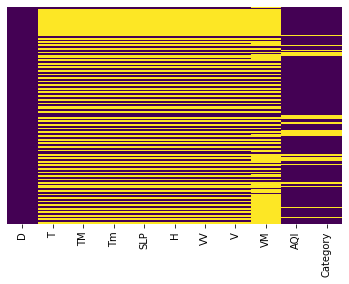

In [9]:
sns.heatmap(aqi.isnull(),yticklabels=False,cbar=False,cmap='viridis')

T = Average Temperature (°C) , TM = Maximum temperature (°C),

Tm = Minimum temperature (°C), SLP= Atmospheric pressure at sea level (hPa),

H = Average relative humidity (%), VV = Average visibility (Km),

V = Average wind speed (Km/h), VM = Maximum sustained wind speed (Km/h), AQI = Air Quality Index


# Convert object type as float type



In [10]:
aqi['T'] = aqi['T'].replace({'NAN':np.nan}).astype(float)
aqi['TM'] = aqi['TM'].replace({'NAN':np.nan}).astype(float)
aqi['Tm'] = aqi['Tm'].replace({'NAN':np.nan}).astype(float)
aqi['SLP'] = aqi['SLP'].replace({'NAN':np.nan}).astype(float)
aqi['H'] = aqi['H'].replace({'NAN':np.nan}).astype(float)
aqi['VV'] = aqi['VV'].replace({'NAN':np.nan}).astype(float)
aqi['V'] = aqi['V'].replace({'NAN':np.nan}).astype(float)
aqi['VM'] = aqi['VM'].replace({'NAN':np.nan}).astype(float)

# Month-1(January)

Find monthly mean

In [11]:
df1 = aqi.iloc[0:31,0:11]
df1.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,18.6,25.7,12.2,1019.2,76.0,4.7,0.0,NaN,197.0,U
1,2,20.0,25.0,15.3,1018.9,85.0,3.9,0.0,NaN,143.0,C
2,3,17.7,19.0,17.2,1017.4,94.0,4.3,0.9,3.5,61.0,M
28,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.0,VU
29,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,266.0,VU
30,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,195.0,U


In [12]:
df1.isnull().sum()

D            0
T           28
TM          28
Tm          28
SLP         28
H           28
VV          28
V           28
VM          30
AQI          2
Category     2
dtype: int64

In [13]:
df1["T"] = df1["T"].fillna(value=df1["T"].mean())
df1["TM"] = df1["TM"].fillna(value=df1["TM"].mean())
df1["Tm"] = df1["Tm"].fillna(value=df1["Tm"].mean())
df1["SLP"] = df1["SLP"].fillna(value=df1["SLP"].mean())
df1["H"] = df1["H"].fillna(value=df1["H"].mean())
df1["VV"] = df1["VV"].fillna(value=df1["VV"].mean())
df1["V"] = df1["V"].fillna(value=df1["V"].mean())
df1["VM"] = df1["VM"].fillna(value=df1["VM"].mean())
df1["AQI"] = df1["AQI"].fillna(value=df1["AQI"].mean())


In [14]:
df1.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,18.600000,25.700000,12.2,1019.2,76.0,4.7,0.0,3.5,197.0,U
1,2,20.000000,25.000000,15.3,1018.9,85.0,3.9,0.0,3.5,143.0,C
2,3,17.700000,19.000000,17.2,1017.4,94.0,4.3,0.9,3.5,61.0,M
3,4,18.766667,23.233333,14.9,1018.5,85.0,4.3,0.3,3.5,48.0,G
4,5,18.766667,23.233333,14.9,1018.5,85.0,4.3,0.3,3.5,69.0,M


In [15]:
df1.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    2
dtype: int64

# Month-2 (February)

In [18]:
df2 = aqi.iloc[31:60,0:11]
df2.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
31,Feb-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,VU
32,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162.0,U
33,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,154.0,U
57,27,21.2,27.0,17.5,1014.0,74.0,5.5,0.0,NaN,124.0,C
58,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,153.0,U
59,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140.0,C


In [19]:
df2.isnull().sum()

D            0
T           23
TM          23
Tm          23
SLP         23
H           23
VV          23
V           23
VM          25
AQI          3
Category     3
dtype: int64

In [20]:
df2["T"] = df2["T"].fillna(value=df2["T"].mean())
df2["TM"] = df2["TM"].fillna(value=df2["TM"].mean())
df2["Tm"] = df2["Tm"].fillna(value=df2["Tm"].mean())
df2["SLP"] = df2["SLP"].fillna(value=df2["SLP"].mean())
df2["H"] = df2["H"].fillna(value=df2["H"].mean())
df2["VV"] = df2["VV"].fillna(value=df2["VV"].mean())
df2["V"] = df2["V"].fillna(value=df2["V"].mean())
df2["VM"] = df2["VM"].fillna(value=df2["VM"].mean())
df2["AQI"] = df2["AQI"].fillna(value=df2["AQI"].mean())

In [21]:
df2.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
31,Feb-01,21.633333,27.666667,17.15,1015.25,77.166667,4.666667,0.466667,3.65,206.0,VU
32,2,21.633333,27.666667,17.15,1015.25,77.166667,4.666667,0.466667,3.65,162.0,U
33,3,21.633333,27.666667,17.15,1015.25,77.166667,4.666667,0.466667,3.65,154.0,U
34,4,21.633333,27.666667,17.15,1015.25,77.166667,4.666667,0.466667,3.65,160.0,U
35,5,21.633333,27.666667,17.15,1015.25,77.166667,4.666667,0.466667,3.65,175.0,U


In [22]:
df2.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    3
dtype: int64

# Month-3(March)

In [23]:
df3 = aqi.iloc[60:91,0:11]
df3.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
60,Mar-01,24.4,30.2,16.6,1012.1,58.0,5.5,0.6,3.5,150.0,C
61,2,23.4,30.6,18.2,1011.7,78.0,5.1,0.0,NaN,299.0,VU
62,3,23.9,29.8,18.6,1011.0,70.0,5.6,1.3,3.5,176.0,U
88,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118.0,C
89,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.0,C
90,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116.0,C


In [24]:
df3.isnull().sum()

D            0
T           16
TM          16
Tm          16
SLP         16
H           16
VV          16
V           16
VM          22
AQI         10
Category    10
dtype: int64

In [25]:
df3["T"] = df3["T"].fillna(value=df3["T"].mean())
df3["TM"] = df3["TM"].fillna(value=df3["TM"].mean())
df3["Tm"] = df3["Tm"].fillna(value=df3["Tm"].mean())
df3["SLP"] = df3["SLP"].fillna(value=df3["SLP"].mean())
df3["H"] = df3["H"].fillna(value=df3["H"].mean())
df3["VV"] = df3["VV"].fillna(value=df3["VV"].mean())
df3["V"] = df3["V"].fillna(value=df3["V"].mean())
df3["VM"] = df3["VM"].fillna(value=df3["VM"].mean())
df3["AQI"] = df3["AQI"].fillna(value=df3["AQI"].mean())

In [26]:
df3.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
60,Mar-01,24.400000,30.200000,16.600000,1012.100000,58.000000,5.500000,0.60,3.500000,150.000000,C
61,2,23.400000,30.600000,18.200000,1011.700000,78.000000,5.100000,0.00,4.411111,299.000000,VU
62,3,23.900000,29.800000,18.600000,1011.000000,70.000000,5.600000,1.30,3.500000,176.000000,U
63,4,25.766667,31.726667,20.173333,1011.653333,65.533333,5.773333,0.76,4.411111,128.000000,C
64,5,25.766667,31.726667,20.173333,1011.653333,65.533333,5.773333,0.76,4.411111,136.666667,NaN


In [27]:
df3.isnull().sum()

D            0
T            0
TM           0
Tm           0
SLP          0
H            0
VV           0
V            0
VM           0
AQI          0
Category    10
dtype: int64

# Month-4(April)

In [28]:
df4 = aqi.iloc[91:121,0:11]
df4.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
91,Apr-01,29.8,36.2,21.4,1008.1,64.0,6.3,0.9,3.5,121.0,C
92,2,31.3,36.4,25.0,1007.2,61.0,6.1,2.0,3.5,82.0,M
93,3,29.9,35.6,26.0,1009.0,69.0,6.1,0.7,3.5,79.0,M
118,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,G
119,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,G
120,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,G


In [29]:
df4.isnull().sum()

D            0
T           15
TM          15
Tm          15
SLP         15
H           15
VV          15
V           15
VM          15
AQI          0
Category     0
dtype: int64

In [30]:
df4["T"] = df4["T"].fillna(value=df4["T"].mean())
df4["TM"] = df4["TM"].fillna(value=df4["TM"].mean())
df4["Tm"] = df4["Tm"].fillna(value=df4["Tm"].mean())
df4["SLP"] = df4["SLP"].fillna(value=df4["SLP"].mean())
df4["H"] = df4["H"].fillna(value=df4["H"].mean())
df4["VV"] = df4["VV"].fillna(value=df4["VV"].mean())
df4["V"] = df4["V"].fillna(value=df4["V"].mean())
df4["VM"] = df4["VM"].fillna(value=df4["VM"].mean())

In [31]:
df4.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
91,Apr-01,29.80,36.200000,21.40,1008.10,64.000000,6.300000,0.900000,3.500000,121.0,C
92,2,31.30,36.400000,25.00,1007.20,61.000000,6.100000,2.000000,3.500000,82.0,M
93,3,29.90,35.600000,26.00,1009.00,69.000000,6.100000,0.700000,3.500000,79.0,M
94,4,28.86,34.546667,23.76,1009.16,70.666667,6.113333,2.146667,6.226667,84.0,M
95,5,28.86,34.546667,23.76,1009.16,70.666667,6.113333,2.146667,6.226667,106.0,C


In [32]:
df4.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

# Month-5 (May)

In [33]:
df5 = aqi.iloc[121:152,0:11]
df5.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
121,May-01,26.6,33.0,24.0,1008.6,83.0,6.0,2.0,5.4,43.0,G
122,2,27.8,33.0,23.6,1007.8,73.0,5.8,0.9,3.5,45.0,G
123,3,28.3,33.0,23.5,1007.8,76.0,5.8,1.1,3.5,48.0,G
149,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,G
150,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,G
151,31,29.3,33.0,23.7,1008.1,78.0,6.0,0.7,5.4,27.0,G


In [34]:
df5.isnull().sum()

D            0
T           15
TM          15
Tm          15
SLP         15
H           15
VV          15
V           15
VM          15
AQI          0
Category     0
dtype: int64

In [35]:
df5["T"] = df5["T"].fillna(value=df5["T"].mean())
df5["TM"] = df5["TM"].fillna(value=df5["TM"].mean())
df5["Tm"] = df5["Tm"].fillna(value=df5["Tm"].mean())
df5["SLP"] = df5["SLP"].fillna(value=df5["SLP"].mean())
df5["H"] = df5["H"].fillna(value=df5["H"].mean())
df5["VV"] = df5["VV"].fillna(value=df5["VV"].mean())
df5["V"] = df5["V"].fillna(value=df5["V"].mean())
df5["VM"] = df5["VM"].fillna(value=df5["VM"].mean())

In [36]:
df5.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
121,May-01,26.60000,33.00000,24.00,1008.60000,83.0,6.0000,2.0000,5.40000,43.0,G
122,2,27.80000,33.00000,23.60,1007.80000,73.0,5.8000,0.9000,3.50000,45.0,G
123,3,28.30000,33.00000,23.50,1007.80000,76.0,5.8000,1.1000,3.50000,48.0,G
124,4,28.76875,33.44375,24.85,1005.00625,78.0,5.9125,5.3625,11.56875,45.0,G
125,5,28.76875,33.44375,24.85,1005.00625,78.0,5.9125,5.3625,11.56875,40.0,G


In [37]:
df5.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

# Month-6 (June)

In [38]:
df6 = aqi.iloc[152:182,0:11]
df6.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
152,Jun-01,29.1,35.0,23.0,1007.6,79.0,5.6,1.5,7.6,24.0,G
153,2,30.4,35.5,25.8,1006.2,75.0,6.3,2.6,5.4,25.0,G
154,3,31.2,35.0,25.0,1005.4,74.0,6.4,2.8,5.4,32.0,G
179,28,28.2,33.2,25.4,1002.5,85.0,5.6,2.6,7.6,32.0,G
180,29,28.6,33.0,24.7,1003.2,88.0,6.3,0.9,3.5,38.0,G
181,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df6.isnull().sum()

D            0
T           15
TM          15
Tm          15
SLP         15
H           15
VV          15
V           15
VM          15
AQI          1
Category     1
dtype: int64

In [40]:
df6["T"] = df6["T"].fillna(value=df6["T"].mean())
df6["TM"] = df6["TM"].fillna(value=df6["TM"].mean())
df6["Tm"] = df6["Tm"].fillna(value=df6["Tm"].mean())
df6["SLP"] = df6["SLP"].fillna(value=df6["SLP"].mean())
df6["H"] = df6["H"].fillna(value=df6["H"].mean())
df6["VV"] = df6["VV"].fillna(value=df6["VV"].mean())
df6["V"] = df6["V"].fillna(value=df6["V"].mean())
df6["VM"] = df6["VM"].fillna(value=df6["VM"].mean())
df6["AQI"] = df6["AQI"].fillna(value=df6["AQI"].mean())

In [41]:
df6.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
152,Jun-01,29.10,35.00,23.000000,1007.600000,79.000000,5.60,1.500000,7.600000,24.0,G
153,2,30.40,35.50,25.800000,1006.200000,75.000000,6.30,2.600000,5.400000,25.0,G
154,3,31.20,35.00,25.000000,1005.400000,74.000000,6.40,2.800000,5.400000,32.0,G
155,4,29.72,33.78,26.286667,1002.886667,82.666667,6.18,2.906667,6.666667,30.0,G
156,5,29.72,33.78,26.286667,1002.886667,82.666667,6.18,2.906667,6.666667,26.0,G


In [42]:
df6.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    1
dtype: int64

# Month-7 (July)

In [43]:
df7 = aqi.iloc[182:213,0:11]
df7.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
182,Jul-01,31.1,36.0,27.5,1001.9,80.0,6.6,3.3,5.4,NaN,NaN
183,2,31.6,36.4,28.5,1000.1,75.0,6.1,2.2,5.4,NaN,NaN
184,3,31.2,34.4,28.0,1000.8,80.0,6.1,0.9,3.5,NaN,NaN
210,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212,31,30.7,34.5,27.5,1003.4,80.0,6.4,0.4,3.5,NaN,NaN


In [44]:
df7.isnull().sum()

D            0
T           15
TM          15
Tm          15
SLP         15
H           15
VV          15
V           15
VM          15
AQI         15
Category    15
dtype: int64

In [45]:
df7["T"] = df7["T"].fillna(value=df7["T"].mean())
df7["TM"] = df7["TM"].fillna(value=df7["TM"].mean())
df7["Tm"] = df7["Tm"].fillna(value=df7["Tm"].mean())
df7["SLP"] = df7["SLP"].fillna(value=df7["SLP"].mean())
df7["H"] = df7["H"].fillna(value=df7["H"].mean())
df7["VV"] = df7["VV"].fillna(value=df7["VV"].mean())
df7["V"] = df7["V"].fillna(value=df7["V"].mean())
df7["VM"] = df7["VM"].fillna(value=df7["VM"].mean())
df7["AQI"] = df7["AQI"].fillna(value=df7["AQI"].mean())

In [46]:
df7.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
182,Jul-01,31.10000,36.0,27.50000,1001.900,80.0,6.60000,3.3000,5.4000,40.3125,NaN
183,2,31.60000,36.4,28.50000,1000.100,75.0,6.10000,2.2000,5.4000,40.3125,NaN
184,3,31.20000,34.4,28.00000,1000.800,80.0,6.10000,0.9000,3.5000,40.3125,NaN
185,4,30.25625,33.9,27.25625,1002.675,83.0,6.21875,2.5625,6.4375,40.3125,NaN
186,5,30.25625,33.9,27.25625,1002.675,83.0,6.21875,2.5625,6.4375,40.3125,NaN


In [47]:
df7.isnull().sum()

D            0
T            0
TM           0
Tm           0
SLP          0
H            0
VV           0
V            0
VM           0
AQI          0
Category    15
dtype: int64

# Month-8 (August)

In [48]:
df8 = aqi.iloc[213:244,0:11]
df8.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
213,Aug-01,30.7,36.0,28.0,1001.4,82.0,6.1,0.7,5.4,NaN,NaN
214,2,31.3,34.5,28.2,998.3,82.0,6.4,0.0,NaN,NaN,NaN
215,3,33.3,36.5,29.0,994.0,75.0,6.6,0.0,NaN,NaN,NaN
241,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,G
242,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,G
243,31,30.7,34.5,28.4,1004.1,86.0,6.4,0.0,NaN,64.0,M


In [49]:
df8.isnull().sum()

D            0
T           15
TM          15
Tm          15
SLP         15
H           15
VV          15
V           15
VM          18
AQI          7
Category     7
dtype: int64

In [50]:
df8["T"] = df8["T"].fillna(value=df8["T"].mean())
df8["TM"] = df8["TM"].fillna(value=df8["TM"].mean())
df8["Tm"] = df8["Tm"].fillna(value=df8["Tm"].mean())
df8["SLP"] = df8["SLP"].fillna(value=df8["SLP"].mean())
df8["H"] = df8["H"].fillna(value=df8["H"].mean())
df8["VV"] = df8["VV"].fillna(value=df8["VV"].mean())
df8["V"] = df8["V"].fillna(value=df8["V"].mean())
df8["VM"] = df8["VM"].fillna(value=df8["VM"].mean())
df8["AQI"] = df8["AQI"].fillna(value=df8["AQI"].mean())

In [51]:
df8.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
213,Aug-01,30.700,36.000,28.00000,1001.4000,82.0,6.10000,0.7,5.400000,21.833333,NaN
214,2,31.300,34.500,28.20000,998.3000,82.0,6.40000,0.0,8.223077,21.833333,NaN
215,3,33.300,36.500,29.00000,994.0000,75.0,6.60000,0.0,8.223077,21.833333,NaN
216,4,29.575,32.875,27.23125,1000.1625,85.0,6.03125,3.5,8.223077,21.833333,NaN
217,5,29.575,32.875,27.23125,1000.1625,85.0,6.03125,3.5,8.223077,21.833333,NaN


In [52]:
df8.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    7
dtype: int64

# Month-9 (September)

In [53]:
df9 = aqi.iloc[244:274,0:11]
df9.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
244,Sep-01,28.1,30.0,26.6,1005.6,91.0,6.1,0.9,5.4,22.0,G
245,2,28.7,33.0,26.0,1007.4,86.0,6.1,0.7,3.5,25.0,G
246,3,30.2,34.4,25.8,1008.6,78.0,6.1,0.4,3.5,22.0,G
271,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,G
272,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,G


In [54]:
df9.isnull().sum()

D            0
T           15
TM          15
Tm          15
SLP         15
H           15
VV          15
V           15
VM          19
AQI         12
Category    12
dtype: int64

In [55]:
df9["T"] = df9["T"].fillna(value=df9["T"].mean())
df9["TM"] = df9["TM"].fillna(value=df9["TM"].mean())
df9["Tm"] = df9["Tm"].fillna(value=df9["Tm"].mean())
df9["SLP"] = df9["SLP"].fillna(value=df9["SLP"].mean())
df9["H"] = df9["H"].fillna(value=df9["H"].mean())
df9["VV"] = df9["VV"].fillna(value=df9["VV"].mean())
df9["V"] = df9["V"].fillna(value=df9["V"].mean())
df9["VM"] = df9["VM"].fillna(value=df9["VM"].mean())
df9["AQI"] = df9["AQI"].fillna(value=df9["AQI"].mean())


In [56]:
df9.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
244,Sep-01,28.10,30.00,26.60,1005.60,91.000000,6.100000,0.900000,5.400000,22.000000,G
245,2,28.70,33.00,26.00,1007.40,86.000000,6.100000,0.700000,3.500000,25.000000,G
246,3,30.20,34.40,25.80,1008.60,78.000000,6.100000,0.400000,3.500000,22.000000,G
247,4,29.46,33.22,26.76,1004.22,84.666667,5.946667,1.126667,4.763636,24.000000,G
248,5,29.46,33.22,26.76,1004.22,84.666667,5.946667,1.126667,4.763636,25.555556,NaN


In [57]:
df9.isnull().sum()

D            0
T            0
TM           0
Tm           0
SLP          0
H            0
VV           0
V            0
VM           0
AQI          0
Category    12
dtype: int64

# Month-10 (October)

In [58]:
df10 = aqi.iloc[274:305,0:11]
df10.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
274,Oct-01,28.6,32.0,27.0,1003.2,86.0,6.3,1.3,3.5,25.0,G
275,2,29.3,33.2,26.4,1004.2,82.0,6.0,0.7,3.5,28.0,G
276,3,30.4,34.0,26.4,1005.1,79.0,6.1,0.6,3.5,24.0,G
302,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
303,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,M
304,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,G


In [59]:
df10.isnull().sum()

D            0
T           16
TM          16
Tm          16
SLP         16
H           16
VV          16
V           16
VM          22
AQI          4
Category     4
dtype: int64

In [60]:
df10["T"] = df10["T"].fillna(value=df10["T"].mean())
df10["TM"] = df10["TM"].fillna(value=df10["TM"].mean())
df10["Tm"] = df10["Tm"].fillna(value=df10["Tm"].mean())
df10["SLP"] = df10["SLP"].fillna(value=df10["SLP"].mean())
df10["H"] = df10["H"].fillna(value=df10["H"].mean())
df10["VV"] = df10["VV"].fillna(value=df10["VV"].mean())
df10["V"] = df10["V"].fillna(value=df10["V"].mean())
df10["VM"] = df10["VM"].fillna(value=df10["VM"].mean())
df10["AQI"] = df10["AQI"].fillna(value=df10["AQI"].mean())

In [61]:
df10.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
274,Oct-01,28.600000,32.00,27.00,1003.200000,86.0,6.3,1.300000,3.500000,25.0,G
275,2,29.300000,33.20,26.40,1004.200000,82.0,6.0,0.700000,3.500000,28.0,G
276,3,30.400000,34.00,26.40,1005.100000,79.0,6.1,0.600000,3.500000,24.0,G
277,4,29.493333,33.56,26.16,1006.646667,80.2,6.0,0.573333,4.166667,31.0,G
278,5,29.493333,33.56,26.16,1006.646667,80.2,6.0,0.573333,4.166667,31.0,G


In [62]:
df10.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    4
dtype: int64

# Month-11 (November)

In [63]:
df11 = aqi.iloc[305:335,0:11]
df11.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
305,Nov-01,28.0,31.7,25.3,1010.7,81.0,5.6,2.2,7.6,14.0,G
306,2,27.8,31.5,25.0,1011.6,85.0,5.8,0.0,NaN,39.0,G
307,3,27.9,32.2,24.5,1011.1,84.0,6.0,0.0,NaN,83.0,M
332,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.0,U
333,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,186.0,U
334,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0,U


In [64]:
df11.isnull().sum()

D            0
T           15
TM          15
Tm          15
SLP         15
H           15
VV          15
V           15
VM          27
AQI          1
Category     1
dtype: int64

In [65]:
df11["T"] = df11["T"].fillna(value=df11["T"].mean())
df11["TM"] = df11["TM"].fillna(value=df11["TM"].mean())
df11["Tm"] = df11["Tm"].fillna(value=df11["Tm"].mean())
df11["SLP"] = df11["SLP"].fillna(value=df11["SLP"].mean())
df11["H"] = df11["H"].fillna(value=df11["H"].mean())
df11["VV"] = df11["VV"].fillna(value=df11["VV"].mean())
df11["V"] = df11["V"].fillna(value=df11["V"].mean())
df11["VM"] = df11["VM"].fillna(value=df11["VM"].mean())
df11["AQI"] = df11["AQI"].fillna(value=df11["AQI"].mean())

In [66]:
df11.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
305,Nov-01,28.000000,31.70,25.300000,1010.700000,81.0,5.60,2.20,7.6,14.0,G
306,2,27.800000,31.50,25.000000,1011.600000,85.0,5.80,0.00,5.5,39.0,G
307,3,27.900000,32.20,24.500000,1011.100000,84.0,6.00,0.00,5.5,83.0,M
308,4,25.033333,30.68,20.266667,1012.986667,77.0,5.28,0.22,5.5,89.0,M
309,5,25.033333,30.68,20.266667,1012.986667,77.0,5.28,0.22,5.5,165.0,U


In [67]:
df11.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    1
dtype: int64

# Month-12(December)

In [68]:
df12 = aqi.iloc[335:366,0:11]
df12.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
335,Dec-01,22.0,30.0,15.5,1014.3,70.0,5.1,0.0,NaN,225.0,VU
336,2,22.1,29.0,16.7,1013.1,74.0,5.0,0.4,3.5,196.0,U
337,3,22.4,29.0,16.5,1013.4,72.0,5.0,0.0,NaN,NaN,NaN
363,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,275.0,VU
364,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,234.0,VU
365,31,17.9,25.7,11.6,1015.4,71.0,4.5,0.0,NaN,249.0,VU


In [69]:
df12.isnull().sum() 

D            0
T           15
TM          15
Tm          15
SLP         15
H           15
VV          15
V           15
VM          30
AQI          3
Category     3
dtype: int64

In [70]:
df12["T"] = df12["T"].fillna(value=df12["T"].mean())
df12["TM"] = df12["TM"].fillna(value=df12["TM"].mean())
df12["Tm"] = df12["Tm"].fillna(value=df12["Tm"].mean())
df12["SLP"] = df12["SLP"].fillna(value=df12["SLP"].mean())
df12["H"] = df12["H"].fillna(value=df12["H"].mean())
df12["VV"] = df12["VV"].fillna(value=df12["VV"].mean())
df12["V"] = df12["V"].fillna(value=df12["V"].mean())
df12["VM"] = df12["VM"].fillna(value=df12["VM"].mean())
df12["AQI"] = df12["AQI"].fillna(value=df12["AQI"].mean())

In [71]:
df12.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
335,Dec-01,22.00000,30.00000,15.5,1014.30000,70.000,5.10000,0.000,3.5,225.000000,VU
336,2,22.10000,29.00000,16.7,1013.10000,74.000,5.00000,0.400,3.5,196.000000,U
337,3,22.40000,29.00000,16.5,1013.40000,72.000,5.00000,0.000,3.5,257.321429,NaN
338,4,19.70625,26.26875,14.3,1014.51875,75.625,4.45625,0.025,3.5,341.000000,EU
339,5,19.70625,26.26875,14.3,1014.51875,75.625,4.45625,0.025,3.5,344.000000,EU


In [72]:
df12.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    3
dtype: int64

# Add 12 months frame in a single frame

In [73]:
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]
data = pd.concat(frames)
display(data)

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,18.600000,25.700000,12.2,1019.20000,76.000,4.70000,0.000,3.5,197.0,U
1,2,20.000000,25.000000,15.3,1018.90000,85.000,3.90000,0.000,3.5,143.0,C
2,3,17.700000,19.000000,17.2,1017.40000,94.000,4.30000,0.900,3.5,61.0,M
3,4,18.766667,23.233333,14.9,1018.50000,85.000,4.30000,0.300,3.5,48.0,G
4,5,18.766667,23.233333,14.9,1018.50000,85.000,4.30000,0.300,3.5,69.0,M
...,...,...,...,...,...,...,...,...,...,...,...
361,27,17.000000,25.000000,11.0,1013.70000,68.000,4.70000,0.000,3.5,277.0,VU
362,28,19.706250,26.268750,14.3,1014.51875,75.625,4.45625,0.025,3.5,308.0,EU
363,29,19.706250,26.268750,14.3,1014.51875,75.625,4.45625,0.025,3.5,275.0,VU
364,30,19.706250,26.268750,14.3,1014.51875,75.625,4.45625,0.025,3.5,234.0,VU


In [74]:
data = data.round({'T':2,'TM':2,'Tm':2,'SLP':2,'H':2,'VV':2,'V':2,'VM':2,'AQI':0})
data

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,18.60,25.70,12.2,1019.20,76.00,4.70,0.00,3.5,197.0,U
1,2,20.00,25.00,15.3,1018.90,85.00,3.90,0.00,3.5,143.0,C
2,3,17.70,19.00,17.2,1017.40,94.00,4.30,0.90,3.5,61.0,M
3,4,18.77,23.23,14.9,1018.50,85.00,4.30,0.30,3.5,48.0,G
4,5,18.77,23.23,14.9,1018.50,85.00,4.30,0.30,3.5,69.0,M
...,...,...,...,...,...,...,...,...,...,...,...
361,27,17.00,25.00,11.0,1013.70,68.00,4.70,0.00,3.5,277.0,VU
362,28,19.71,26.27,14.3,1014.52,75.62,4.46,0.02,3.5,308.0,EU
363,29,19.71,26.27,14.3,1014.52,75.62,4.46,0.02,3.5,275.0,VU
364,30,19.71,26.27,14.3,1014.52,75.62,4.46,0.02,3.5,234.0,VU


In [75]:
data.isnull().sum()

D            0
T            0
TM           0
Tm           0
SLP          0
H            0
VV           0
V            0
VM           0
AQI          0
Category    58
dtype: int64

# AQI Range

1. 0 - 50 = GOOD

2. 51 - 100 = MODERATE

3. 101 - 150 = CAUTION

4. 151 - 200 = UNHEALTHY

5. 201 - 300 = VERY UNHEALTHY

6. 301- 500 = EXTREMELY HEALTHY

In [76]:
data.loc[(data['AQI'] >= 0) & (data['AQI'] <= 50) & (data['Category'].isnull()), 'Category'] = "G"
data.loc[(data['AQI'] >= 51) & (data['AQI'] <= 100) & (data['Category'].isnull()), 'Category'] = "M"
data.loc[(data['AQI'] >= 101) & (data['AQI'] <= 150) & (data['Category'].isnull()), 'Category'] = "C"
data.loc[(data['AQI'] >= 151) & (data['AQI'] <= 200) & (data['Category'].isnull()), 'Category'] = "U"
data.loc[(data['AQI'] >= 201) & (data['AQI'] <= 300) & (data['Category'].isnull()), 'Category'] = "VU"
data.loc[(data['AQI'] >= 301) & (data['Category'].isnull()), 'Category'] = "EU"

In [77]:
data.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

In [78]:
data.to_csv(r'F:\CLASS\CSE498R(Directed Research)\Dataset\KhulnaNew\Data-2020.csv', index=False)